<a href="https://www.kaggle.com/code/ahmedrushdi/sign-mnist-cnn?scriptVersionId=121595366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries and dataset
## Libraries

In [1]:
import pandas as pd 
import numpy as np
import keras
import matplotlib.pyplot as plt
# %matplotlib notebook
import cv2
import tensorflow_addons as tfa

## Dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df  = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv" )

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
t = train_df.iloc[:,0].values
y_train = np.where(t > 8 , t-1, t)
X_train = train_df.iloc[:,1:].values.reshape(-1,28,28,1).astype('uint8')

t = test_df.iloc[:,0].values
y_test  = np.where(t > 8 , t-1, t)
X_test  = test_df.iloc[:,1 :].values.reshape(-1,28,28,1).astype('uint8')

print(f'X: {X_train.shape}\t{X_train.min(),X_train.max()}\ny:{y_train.shape}\t\t{y_train.min(),y_train.max()}')
print(f'X: {X_test.shape}\t{X_test.min(),X_test.max()}\ny:{y_test.shape}\t\t{y_test.min(),y_test.max()}')

X: (27455, 28, 28, 1)	(0, 255)
y:(27455,)		(0, 23)
X: (7172, 28, 28, 1)	(0, 255)
y:(7172,)		(0, 23)


# Visualization

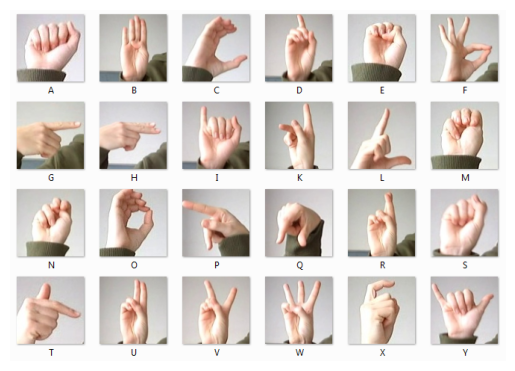

In [6]:
plt.imshow(cv2.imread("/kaggle/input/sign-language-mnist/amer_sign2.png",cv2.IMREAD_COLOR)[...,::-1])
plt.axis('off')
plt.show()

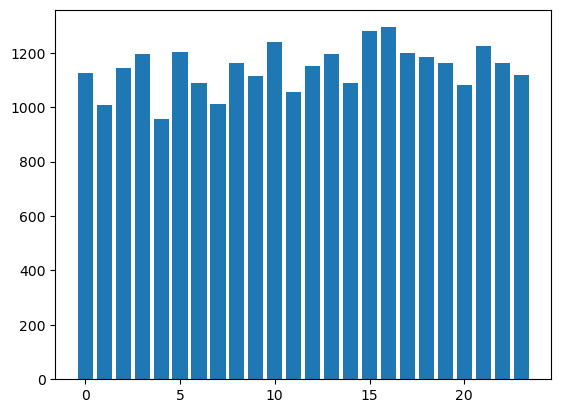

In [7]:
char_to_label_mapping_dict = {
    'A': 0 ,'B': 1 ,'C': 2 ,'D': 3 ,'E': 4 ,'F': 5 ,
    'G': 6 ,'H': 7 ,'I': 8 ,'K': 9 ,'L': 10,'M': 11,
    'N': 12,'O': 13,'P': 14,'Q': 15,'R': 16,'S': 17,
    'T': 18,'U': 19,'V': 20,'W': 21,'X': 22,'Y': 23,
}

label_to_char_mapping_dict = {
    v : k for k,v in char_to_label_mapping_dict.items()
}
plt.hist(y_train, bins = range(0,25), rwidth = .8, align = 'left',label = list(char_to_label_mapping_dict.keys()))
plt.show()

In [8]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

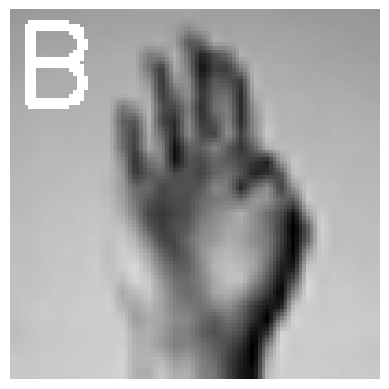

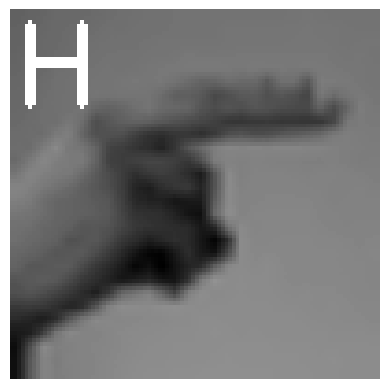

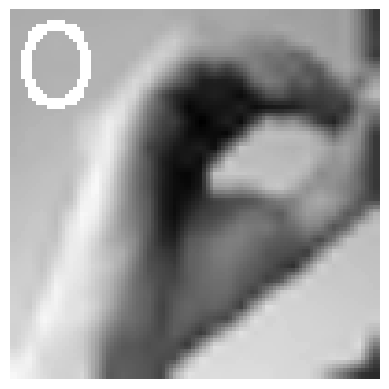

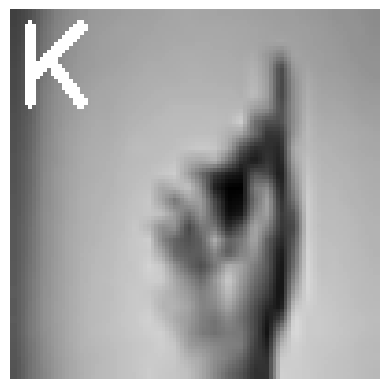

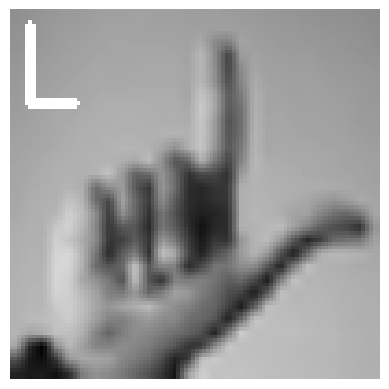

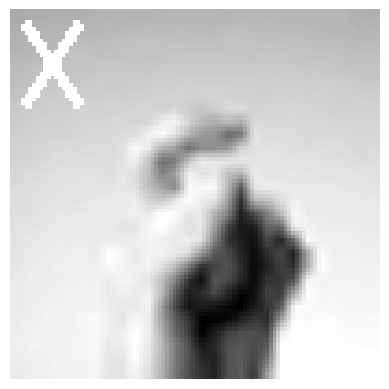

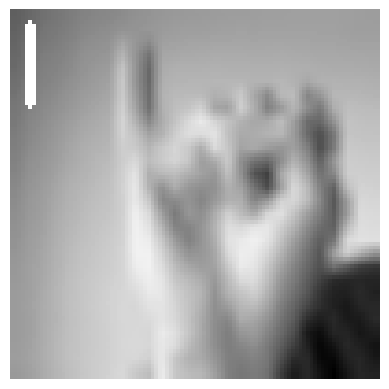

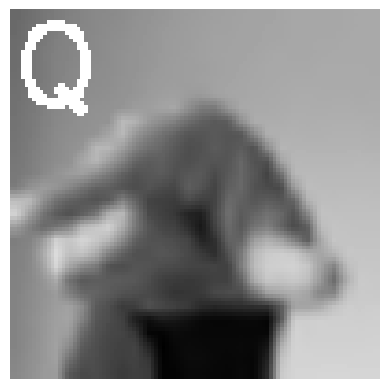

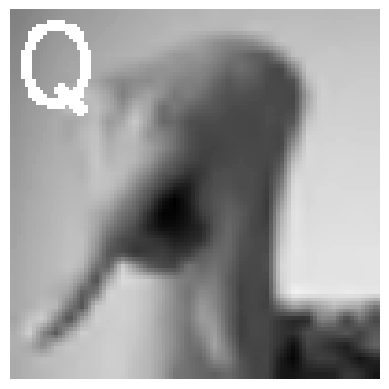

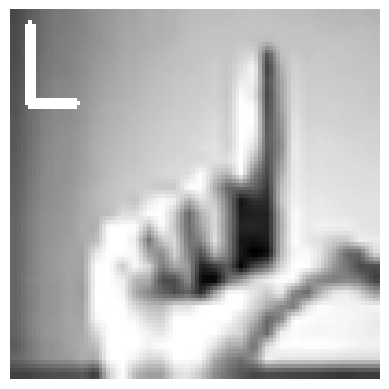

In [9]:
for i in np.random.choice(range(X_train.shape[0]),10):
#     cv2.putText(
#             img = cv2.imread("C:Users/ENG-13.NCPC/Desktop/Datasets/cat_vs_dog/train/cat/cat.0.jpg").shape,
#             text = label_to_char_mapping_dict[y_train[i]],
#             color = (0),
#             bottomLeftOrigin = True,
#             org = (0,0),
#             fontFace = cv2.FONT_HERSHEY_COMPLEX,
#             fontScale = 5
#         )
    plt.imshow(
        cv2.putText(
            thickness = 2,
            img = cv2.resize(X_train[i],(100,100)),
            text = label_to_char_mapping_dict[y_train[i]],
            color = 255,
#             bottomLeftOrigin = True,
            org = (1,25),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 1
        ),
        'gray'
    )

#     plt.figure(figsize=(100,100))
    plt.axis('off')
    plt.show()

# Preprocessing

In [10]:
y_train, X_train = keras.utils.to_categorical(y_train), X_train /255
y_test , X_test  = keras.utils.to_categorical(y_test) , X_test  /255
print(f'X: {X_train.shape}\t{X_train.min(),X_train.max()}\ny: {y_train.shape}\t\t{y_train.min(),y_train.max()}')
print(f'X: {X_test.shape} \t{X_test.min(),X_test.max()}  \ny: {y_test.shape} \t\t{y_test.min() ,y_test.max()} ')

X: (27455, 28, 28, 1)	(0.0, 1.0)
y: (27455, 24)		(0.0, 1.0)
X: (7172, 28, 28, 1) 	(0.0, 1.0)  
y: (7172, 24) 		(0.0, 1.0) 


# Model

## Structure

In [11]:
model = keras.Sequential(
[
    keras.layers.RandomRotation(factor = 0.03, input_shape=(28,28,1)),
    keras.layers.RandomZoom(0.05),
#     keras.layers.RandomTranslation(0.05,0.05),
    keras.layers.Conv2D(32 ,(3,3) ,activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3) , padding ='same', activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(256,(3,3), padding ='same', activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation =    'relu'),
    keras.layers.Dense(24 , activation = 'softmax')
]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Callbacks

In [13]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'sign_mnist_model_1.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)
lr_red = keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.8,
    verbose = 1,
    cooldown = 5

    
)

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_accuracy',
    
# )

## Training the model

In [14]:
history = model.fit(X_train,y_train,
          batch_size =16,
          epochs = 100,
          verbose=2,
          validation_data = (X_test, y_test),
          callbacks = [
#               tfa.callbacks.TQDMProgressBar(),
              model_checkpoint,
#              lr_red
          ]
     )

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.78291, saving model to sign_mnist_model_1.h5
1716/1716 - 57s - loss: 1.9833 - accuracy: 0.3599 - val_loss: 0.6209 - val_accuracy: 0.7829 - 57s/epoch - 33ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.78291 to 0.89863, saving model to sign_mnist_model_1.h5
1716/1716 - 56s - loss: 0.5812 - accuracy: 0.7909 - val_loss: 0.2785 - val_accuracy: 0.8986 - 56s/epoch - 32ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.89863 to 0.95343, saving model to sign_mnist_model_1.h5
1716/1716 - 55s - loss: 0.3411 - accuracy: 0.8826 - val_loss: 0.1457 - val_accuracy: 0.9534 - 55s/epoch - 32ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.95343 to 0.97100, saving model to sign_mnist_model_1.h5
1716/1716 - 52s - loss: 0.2519 - accuracy: 0.9178 - val_loss: 0.1043 - val_accuracy: 0.9710 - 52s/epoch - 31ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.97100 to 0.97895, saving model to sign_mnist_model_1.h5
1716

In [15]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.0166 - accuracy: 0.9946


[0.016638586297631264, 0.9945622086524963]

In [16]:
model = keras.models.load_model('sign_mnist_model_1.h5')
model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 10ms/step - loss: 0.0027 - accuracy: 0.9997


[0.002655771793797612, 0.999721109867096]

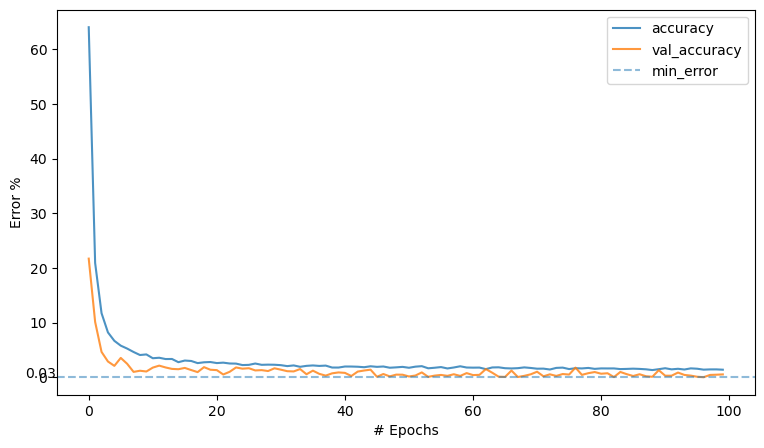

In [17]:
# %matplotlib notebook

plt.figure(figsize=(9,5))
# plt.ylim(0,100)
# plt.xlim(0,200)
plt.ylabel('Error %')
plt.xlabel('# Epochs')
plt.plot((1-np.array(history.history['accuracy']))*100, label = 'accuracy', alpha = 0.8)
plt.plot((1-np.array(history.history['val_accuracy']))*100, label = 'val_accuracy', alpha = 0.8)
plt.axhline((1-np.max(history.history['val_accuracy']))*100, ls = '--', alpha = 0.5, label = 'min_error')
plt.text(-10, (1-np.max(history.history['val_accuracy']))*100,
         f"{np.round(1-np.max(history.history['val_accuracy']),4)*100}",
         fontsize=10)
plt.legend()
plt.show()